In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

# Read the data

In [2]:
df = pd.read_csv('data/ACME-HappinessSurvey2020.csv')

---

# EDA

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.shape

(126, 7)

In [5]:
df.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [7]:
df.rename(columns={"Y": "happy_customer", "X1": "delivered_on_time", "X2": "expected_order"
                  , "X3": "ordered_everything", "X4": "good_price", "X5": "satisfied"
                  , "X6": " easy_app"}, inplace = True)

- data Includes `126 rows ` and  `7 columns`.
- There are no missing data and all if the features have the right data type.
- I renamed the columns to more understandable names, as these names were chosen based on what the data means for each column, as mentioned.

----------------------------------------------------------------------------
delivered_on_time values:
Frequency:[1, 20, 40, 65]
Percentage of people agreeing with delivered_on_time 83.33333333333334 %
Percentage of people opposing with delivered_on_time 0.7936507936507936 %
----------------------------------------------------------------------------


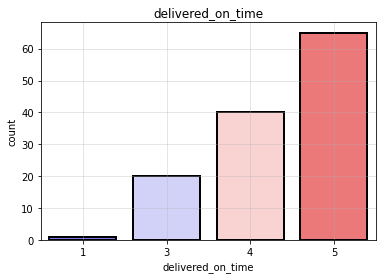

----------------------------------------------------------------------------
expected_order values:
Frequency:[6, 17, 27, 34, 42]
Percentage of people agreeing with expected_order 18.253968253968253 %
Percentage of people opposing with expected_order 48.41269841269841 %
----------------------------------------------------------------------------


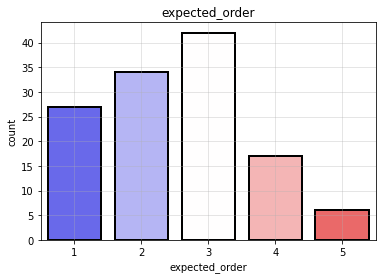

----------------------------------------------------------------------------
ordered_everything values:
Frequency:[7, 14, 17, 33, 55]
Percentage of people agreeing with ordered_everything 39.682539682539684 %
Percentage of people opposing with ordered_everything 16.666666666666664 %
----------------------------------------------------------------------------


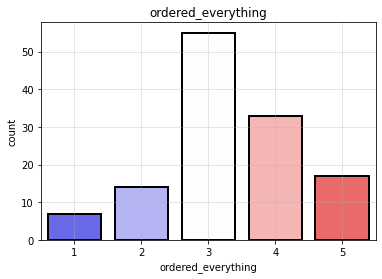

----------------------------------------------------------------------------
good_price values:
Frequency:[2, 5, 25, 41, 53]
Percentage of people agreeing with good_price 61.904761904761905 %
Percentage of people opposing with good_price 5.555555555555555 %
----------------------------------------------------------------------------


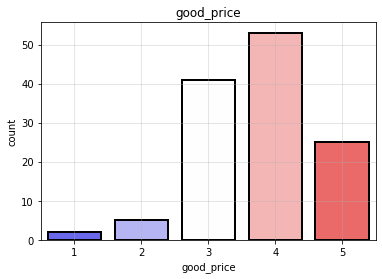

----------------------------------------------------------------------------
satisfied values:
Frequency:[7, 16, 22, 31, 50]
Percentage of people agreeing with satisfied 64.28571428571429 %
Percentage of people opposing with satisfied 18.253968253968253 %
----------------------------------------------------------------------------


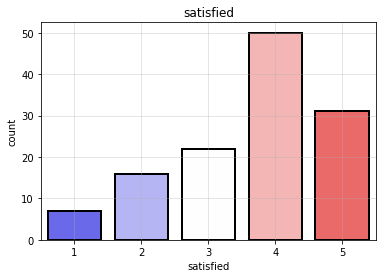

----------------------------------------------------------------------------
 easy_app values:
Frequency:[1, 1, 20, 47, 57]
Percentage of people agreeing with  easy_app 82.53968253968253 %
Percentage of people opposing with  easy_app 1.5873015873015872 %
----------------------------------------------------------------------------


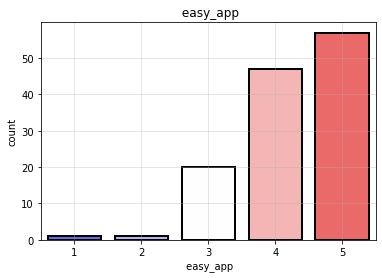

In [8]:
for col in df.columns:
    if col != 'happy_customer':
        sns.countplot(x=col, data=df,  palette='bwr', edgecolor='black', linewidth=2) 
        plt.title(col)
        print('--'*38)
   
        print(f'{col} values:\nFrequency:{sorted(df[col].value_counts())}')
    
        positive = df.loc[(df[col] > 3)].shape[0]
        positive_percentage = positive / df.shape[0]
        negative = df.loc[(df[col] < 3)].shape[0]
        negative_percentage = negative / df.shape[0]
        print('Percentage of people agreeing with' , col, positive_percentage * 100, '%')
        print('Percentage of people opposing with' , col , negative_percentage * 100, '%')

        print('--'*38)
        plt.grid(alpha=0.4)

        
        plt.show()

Looking at the categories within each column, 5 means that the customer agrees or rates this characteristic with the highest and 1 is the lowest.
In order to see how satisfied customers are with every part of the ordering process, I printed the percentage of all people who rated with  4 or 5, and the percentage of people who were dissatisfied with the percentage of all people who rated with 1 or 2, and I did not take the 3 into consideration because it represents the middle, i.e. neutrality.


Looking at the results we see that all the processes are rated OK to Excellent, but the most urgent part that needs improvement is the `expected order ` feature, about half of the customers `48.4%` are not receiving the order as it is, which means there is a problem also the customer sees something in the application and gets something else or either due to Poor quality pictures, or because they show a different product, such as size or color, or because of lack of information, there are no detailed explanation for the product. Or it could be that while the products are being processed and shipped, different products from the order are being shipped.

Either way, they should investigate further and work to fix the problem.

----------------------------------------------------------------------------
happy_customer:
1    69
0    57
Name: happy_customer, dtype: int64
----------------------------------------------------------------------------


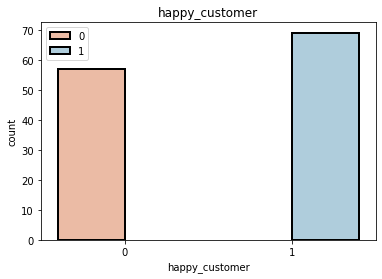

----------------------------------------------------------------------------
delivered_on_time:
5    65
4    40
3    20
1     1
Name: delivered_on_time, dtype: int64
----------------------------------------------------------------------------


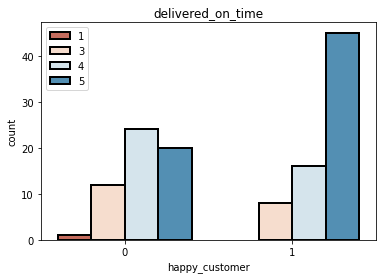

----------------------------------------------------------------------------
expected_order:
3    42
2    34
1    27
4    17
5     6
Name: expected_order, dtype: int64
----------------------------------------------------------------------------


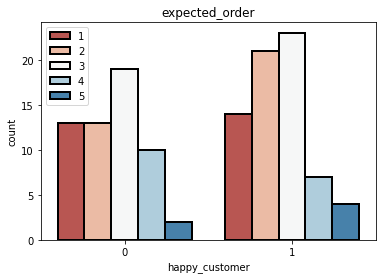

----------------------------------------------------------------------------
ordered_everything:
3    55
4    33
5    17
2    14
1     7
Name: ordered_everything, dtype: int64
----------------------------------------------------------------------------


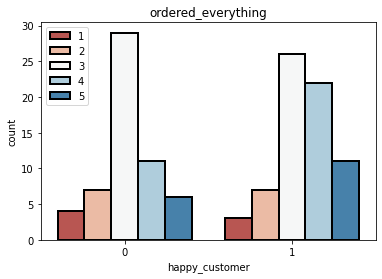

----------------------------------------------------------------------------
good_price:
4    53
3    41
5    25
2     5
1     2
Name: good_price, dtype: int64
----------------------------------------------------------------------------


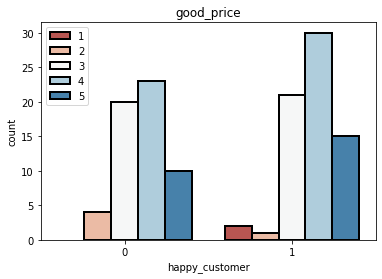

----------------------------------------------------------------------------
satisfied:
4    50
5    31
3    22
2    16
1     7
Name: satisfied, dtype: int64
----------------------------------------------------------------------------


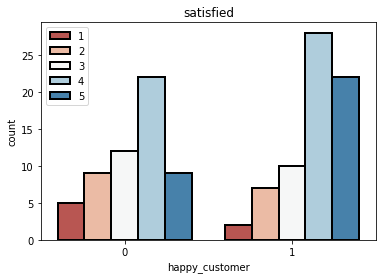

----------------------------------------------------------------------------
 easy_app:
5    57
4    47
3    20
1     1
2     1
Name:  easy_app, dtype: int64
----------------------------------------------------------------------------


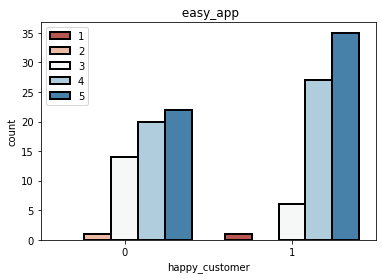

In [9]:
for column in df.columns:
    ax = sns.countplot(df.happy_customer, hue=df[column], palette='RdBu', edgecolor='black', linewidth=2)
    
    plt.title(column)
    plt.legend(loc=2)

    print('--'*38)
    print('{}:\n{}'.format(column, df[column].value_counts()))    
    print('--'*38)

    plt.show()

----------------------------------------------------------------------------
happy_customer:
1    69
0    57
Name: happy_customer, dtype: int64
----------------------------------------------------------------------------


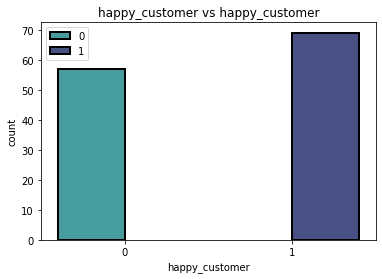

----------------------------------------------------------------------------
delivered_on_time:
5    65
4    40
3    20
1     1
Name: delivered_on_time, dtype: int64
----------------------------------------------------------------------------


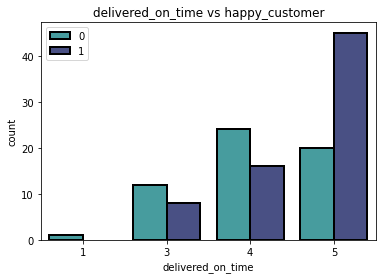

----------------------------------------------------------------------------
expected_order:
3    42
2    34
1    27
4    17
5     6
Name: expected_order, dtype: int64
----------------------------------------------------------------------------


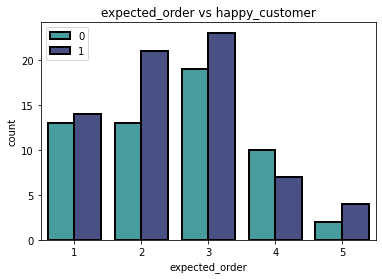

----------------------------------------------------------------------------
ordered_everything:
3    55
4    33
5    17
2    14
1     7
Name: ordered_everything, dtype: int64
----------------------------------------------------------------------------


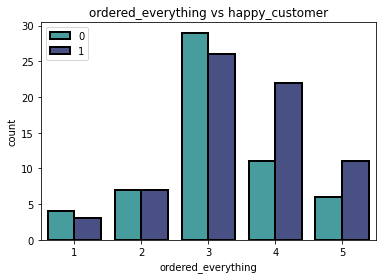

----------------------------------------------------------------------------
good_price:
4    53
3    41
5    25
2     5
1     2
Name: good_price, dtype: int64
----------------------------------------------------------------------------


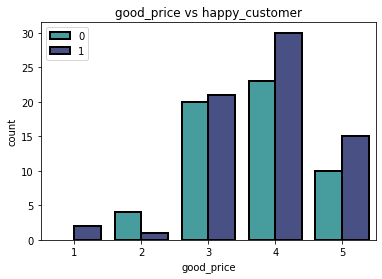

----------------------------------------------------------------------------
satisfied:
4    50
5    31
3    22
2    16
1     7
Name: satisfied, dtype: int64
----------------------------------------------------------------------------


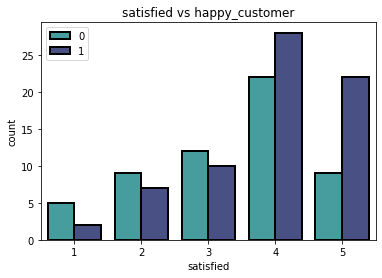

----------------------------------------------------------------------------
 easy_app:
5    57
4    47
3    20
1     1
2     1
Name:  easy_app, dtype: int64
----------------------------------------------------------------------------


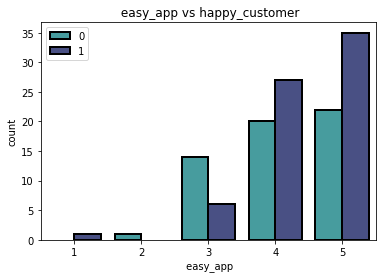

In [10]:
for column in df.columns:
    ax = sns.countplot(df[column], hue=df.happy_customer, palette='mako_r', edgecolor='black', linewidth=2)
    
    plt.title(column+ ' vs happy_customer')
    plt.legend(loc=2)

    print('--'*38)
    print('{}:\n{}'.format(column, df[column].value_counts()))    
    print('--'*38)

    plt.show()


- The data appears to be semi-balanced as there is no significant bias towards one class.
- From the figures, I cannot see a clear relationship between any feature and the customer's dissatisfaction, but I can say that several combined things contribute to the customer's dissatisfaction, and not one clear part. Perhaps by asking more questions, such as when the customer answers with dissatisfaction that if the order does not reach him as he expected, he should been asked if the pictures are not clear or if the description is inaccurate or if he received a product that he did not order and so on.

---

# Build Models

In [11]:
X = df.drop("happy_customer", axis=1).values
y = df["happy_customer"].values


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size= 0.33)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.62
Accuracy of Logistic regression classifier on test set: 0.62


## Decision Tree

In [14]:

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.52


## K-Nearest Neighbors

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.50


## Linear Discriminant Analysis

In [16]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.64
Accuracy of LDA classifier on test set: 0.62


## Gaussian Naive Bayes

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.67
Accuracy of GNB classifier on test set: 0.64


## Support Vector Machine

In [18]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.60


The best model in terms of it's good fit is `Logistic Regression` with `62%` test score.